In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import healpy as hp

In [3]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [4]:
nu = np.linspace(100, 1000, 1000) *1e9

In [6]:
X = hplanck * nu / (kboltz * TCMB) 
G = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2

(0.1, 1000)

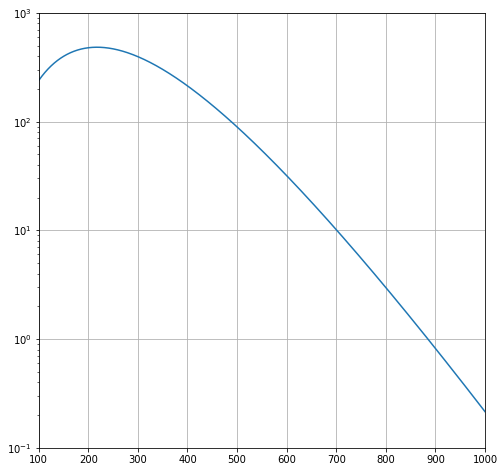

In [12]:
figsize(8,8)
semilogy(nu*1e-9, G*1e26*1e-6)
grid()
xlim(100, 1000)
ylim(0.1, 1000)

In [4]:
lonc = 107.2
latc = 5.2
lonra = [lonc-2., lonc+2.]
latra = [latc-2., latc+2.]

In [5]:
haslam0408 = hp.read_map('../externaldata/lambda_haslam408_dsds.fits', verbose=False)
#haslam0408 = hp.ud_grade(hp.smoothing(haslam0408, fwhm=1.*d2r), 512)

In [6]:
x = np.copy(haslam0408)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r)
amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))

In [7]:
nu = 408.e6
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
y = x * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

21.517600061 0.76064909027


In [ ]:
wmap23 = hp.read_map('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', verbose=False) * 1.e-3
x = np.copy(wmap23)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r)
amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))
nu = 22.71e9
X = hplanck * nu / (kboltz * TCMB) 
kcmb_to_kthermo = (np.exp(X) - 1.)**2 / (X**2 * np.exp(X))
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26 
y = x * kcmb_to_kthermo * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

In [9]:
def wmap_calc(wmap, nu):
    wmapmap = hp.read_map(wmap, verbose=False) * 1.e-3
    x = np.copy(wmapmap)
    nside = hp.get_nside(x)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, 1.*d2r)
    amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
    amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
    amask = np.array(list(amaskout.difference(amaskin)))
    X = hplanck * nu / (kboltz * TCMB) 
    #kcmb_to_kthermo = (np.exp(X) - 1.)**2 / (X**2 * np.exp(X))
    kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
    y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 
    rdata = y[rmask]
    adata = y[amask]
    print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

In [10]:
def planck_calc(planck, nu):
    planckmap = hp.read_map(planck, verbose=False)
    #planckmap = hp.ud_grade(hp.smoothing(planckmap, fwhm=1.*d2r, verbose=False), 512)
    planckmap = hp.smoothing(hp.ud_grade(planckmap, 512), fwhm=1.*d2r, verbose=False)
    x = np.copy(planckmap)
    nside = hp.get_nside(x)
    vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
    rmask = hp.query_disc(nside, vecc, 1.*d2r)
    amaskout = set(hp.query_disc(nside, vecc, 2.*d2r))
    amaskin = set(hp.query_disc(nside, vecc, (80./60.)*d2r))
    amask = np.array(list(amaskout.difference(amaskin)))
    X = hplanck * nu / (kboltz * TCMB) 
    kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
    if nu < 400e9:
        y = x * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26 
    else:
        y = x * 1e6 * hp.nside2pixarea(nside)
    rdata = y[rmask]
    adata = y[amask]
    print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

In [148]:
planck_calc('../externaldata/LFI_SkyMap_030-field-IQU_1024_R2.01_full.fits', nu=28.5e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
34.0938129227 0.499954790305


In [149]:
planck_calc('../externaldata/LFI_SkyMap_044-field-IQU_1024_R2.01_full.fits', nu=44.1e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
31.0214717244 0.484510652725


In [150]:
planck_calc('../externaldata/LFI_SkyMap_070-field-IQU_1024_R2.01_full.fits', nu=70.3e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
30.8416544601 0.752870316413


In [151]:
planck_calc('../externaldata/HFI_SkyMap_143-field-IQU_2048_R2.02_full.fits', nu=143.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
98.2854344619 3.96727436994


In [152]:
planck_calc('../externaldata/HFI_SkyMap_217-field-IQU_2048_R2.02_full.fits', nu=217.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
464.589826389 15.7643548539


In [153]:
planck_calc('../externaldata/HFI_SkyMap_353-field-IQU_2048_R2.02_full.fits', nu=353.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
1963.34800683 64.71523176


In [154]:
planck_calc('../externaldata/HFI_SkyMap_545-field-Int_2048_R2.02_full.fits', nu=545.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
6584.77605578 199.031172171


In [155]:
planck_calc('../externaldata/HFI_SkyMap_857-field-Int_2048_R2.02_full.fits', nu=857.e9)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
21576.6144537 559.282861732


In [11]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_K_v5.fits', nu=22.71e9)

38.3596538566 0.542670744947


In [12]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Ka_v5.fits', nu=32.95e9)

37.380664695 0.517350833879


In [13]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_Q_v5.fits', nu=40.65e9)

34.3766467408 0.492859057246


In [14]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_V_v5.fits', nu=60.64e9)

31.7301556703 0.614105126604


In [15]:
wmap_calc('../externaldata/wmap_band_smth_imap_r9_9yr_W_v5.fits', nu=93.44e9)

40.4134705258 1.32781363164
